# Wireless Lab: Exploring Frequency Domain

### EECS 16A: Designing Information Devices and Systems I, Fall 2015

**Name 1**:

**Login**: ee16a-


**Name 2**:

**Login**: ee16a-

# Before you begin

<span style="color:red">**Attention:**</span> <span style="color:blue">Connect the SDR dongle to your workstation and restart the kernel (click on IPython menu: Kernel > Restart). The base of SDR antenna has a magnet so you can place it securely on the top of the self of your workstation.</span>

NOTE: If you'd like to see the pre-lab presentation you can view it [here!](https://docs.google.com/presentation/d/16tWHiB7mIEk5QwA4E4i2S0ogOHgcxEHde5M5PugbetY/edit?usp=sharing)


## Python imports

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant
import sys
# import float division explicitly to have compatibility with Python2
from __future__ import division
from pprint import pprint
from time import time
from pylab import *
from IPython.display import Audio
import scipy.io.wavfile as wf

# set the font size for plots
plt.rcParams['font.size']=12

Populating the interactive namespace from numpy and matplotlib


## Introduction to the frequency domain

In this class, we learned about representing **vectors** using different bases; it turns out we can view **functions** as vectors and represent them in different bases using similar tools! As we shall see much more in **EE16B**,  engineers like to talk about periodic signals as combinations of sinusoidal waves, that is, with respect to a basis composed of sinusoids (this is justified by the theory of _linear time invariant systems_ that shows why this is a good way of thinking about signals generally, not just periodic ones). The simplest sinusoids mathematically are the complex exponentials but in this lab, we will be using sine and cosine waves. 

Run the following block of code to generate a periodic function made up of a constant signal and two sinusoidal functions.

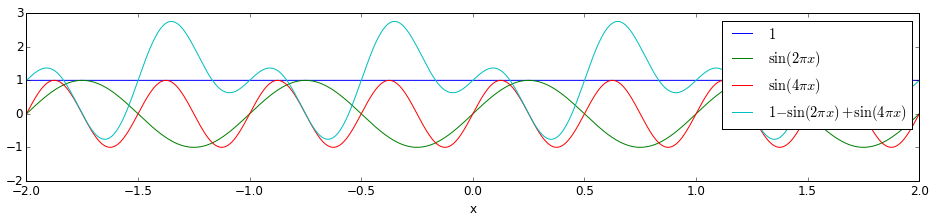

In [2]:
t = np.arange(-2,2,1e-3)
f1 = ones(size(t))
f2 = np.sin(2*np.pi*t)
f3 = np.sin(2*np.pi*2*t)

y = f1 - f2 + f3

figure(figsize=(16,3));
plt.plot(t,f1,label='$1$')
plt.plot(t,f2,label='$\sin(2\pi x)$')
plt.plot(t,f3,label='$\sin(4\pi x)$')
plt.plot(t,y,label='$1 - \sin(2\pi x) + \sin(4\pi x)$')
plt.xlabel('x')
plt.xlim([-2,2])
plt.ylim([-2,3])

plt.legend();

In the figure, we have the functions
\begin{align*}
    g_1(x) &= 1, \\
    g_2(x) &= \sin(2\pi x), \\
    g_3(x) &= \sin(4\pi x).
\end{align*}

If a function $g(x)$ satisfies the relation 
$$g(x - T) = g(x)$$
for all values of $x$, then it is called periodic and the value $T$ is called a period of the function. The smallest of such $T$'s is called the **fundamental period**. In our example, $g_2(x)$ has fundamental period $1$ and $g_3(x)$ has fundamental period $0.5$. For constant functions like $g_1(x)$, the notion of fundamental period does not make sense since they are periodic with all periods. 

The **fundamental frequency** of a periodic function is defined as the multiplicative inverse of its fundamental period. For example, $g_2(x)$ has fundamental frequency $f_2 = 1/1 = 1$ and $g_3(x)$ has fundamental frequency $f_3 = 1/0.5 = 2$. An intuitive way to see fundamental frequency is if we wait for one second, we will see exactly one complete cycle of the function $g_2(x)$. In one second, we will see exactly two complete cycles of the function $g_3(x)$. In general, we will see exactly the fundamental frequency number of complete cycles in one second. For sinusoids, the fundamental frequency is just referred to as the **frequency** of that sinusoid. For constant functions, the frequency is deemed to be zero. 

Now that we have defined the frequency of a sinusoidal function, we can reflect more upon the figure. It shows that the superposition of multiple sinusoidal functions that have commensurate periods generates new periodic functions. If you remember the concept of the lower-common-denominator of a set of commensurate numbers, you can understand that the fundamental period and fundamental frequency define an analogous concept for periodic functions. It turns out that using an appropriate superposition of sinusoidal functions (whose frequencies are natural multiples of the fundamental frequency, including zero) you can represent any periodic function (this may require adding infinitely many sinusoidal functions though). The zeroth frequency component is called the **DC** component. The other multiples are called **harmonics** of the fundamental frequency. Harmonics beyond the first harmonic are often called **overtones**, especially in the musical context. 

Let's explore this using an example. Below is a script that approximates a periodic square wave using different number of sinusoidal functions. 

**<span style="color:red">Try the values $\{1,2,3,10,20,100\}$ for `EXPANSION_ORDER` to change the number of added sinusoidals to approximate the square wave.</span>**

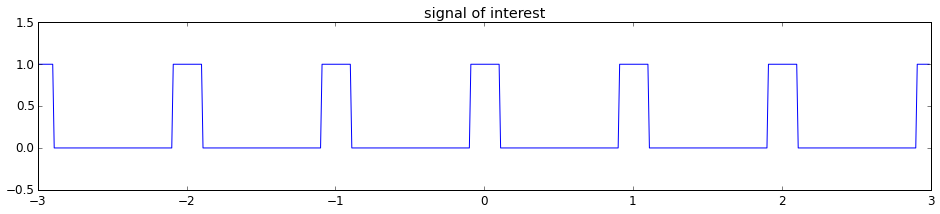

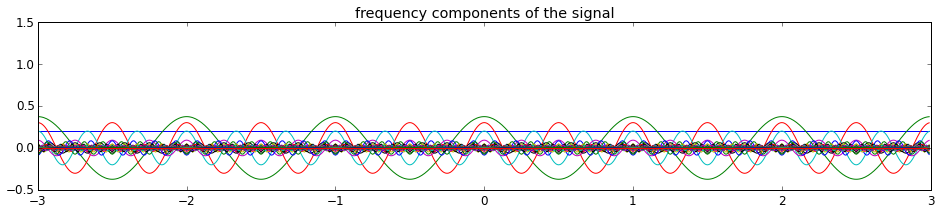

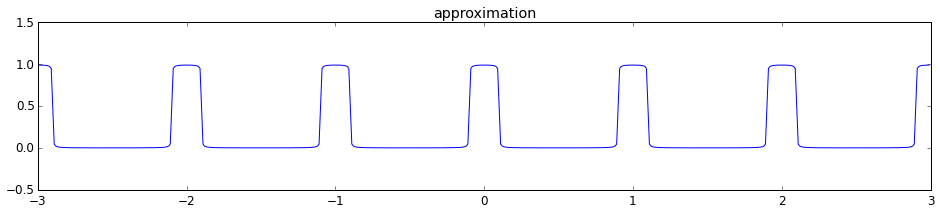

In [5]:
##############################

# CHANGE THE EXPANSION ORDER TO SEE THE EFFECT OF ADDING MORE
# SINUSOIDAL FUNCTIONS TO YOUR EXPANSION
EXPANSION_ORDER = 100;

##############################

# the time duration within a period where the function is equal to 1
DUTYCYCLE = 0.2

if DUTYCYCLE >=1:
    raise ValueError("DUTYCYCLE needs to be less than 1.")

# original signal
t = np.arange(-3,3,1e-2)
y = ( (t+DUTYCYCLE/2) % 1 <= DUTYCYCLE)
figure(figsize=(16,3));
plt.plot(t,y);
plt.ylim(-0.5,1.5);
plt.title('signal of interest')

# sinudoidals
figure(figsize=(16,3));
ztemp = np.ones(len(t))*DUTYCYCLE;
plt.plot(t,ztemp);
for k in range(EXPANSION_ORDER):
    n = k + 1;
    # 'an' are the coordinates of your function in the new basis
    # they are calculated by taking inner products between the function and your
    # basis elements, just like we did in this course.
    an = 2/(n*np.pi)*np.sin(n*np.pi*DUTYCYCLE);
    ztemp = an*np.cos(2*np.pi*n*t)
    plt.plot(t,ztemp);
plt.ylim(-0.5,1.5);
plt.title('frequency components of the signal');

# approximation
figure(figsize=(16,3));
z = np.ones(len(t))*DUTYCYCLE;
for k in range(EXPANSION_ORDER):
    n = k + 1;
    an = 2/(n*np.pi)*np.sin(n*np.pi*DUTYCYCLE);
    z = z + an*np.cos(2*np.pi*n*t)

plt.plot(t,z);
plt.ylim(-0.5,1.5);
plt.title('approximation');

**<span style="color:red">How does the resulting function resemble a square wave as `EXPANSION_ORDER` is increased?</span>**

> Write your answer here:

It first gets the spikes in the right positions, then starts squaring off the corners and straight areas.

So how does these relate to vectors and bases?

We saw that periodic signals can be represented as a superposition of sinusoidal functions with different frequencies. Hence, we can view the sinusoidal functions coming into the superposition as basis vectors, and their weights as the coordinates! For example, $y(x) = 1 - \sin(2 \pi x) + \sin(4 \pi x)$ can be represented by $[1, -1, 1]^T$ with respect to your new basis. 

<a id='task1'></a>
## Task 1: Frequencies in Sound

Before we move to wireless communication, let's first see the benefits of the **frequency domain** in sound.

Run the following code and listen to the audio.

In [6]:
(rate, data) = wf.read("two_tone.wav")
Audio(data, rate=rate)

Can you hear the two tones being played? Let's plot the time domain signal to see what it looks like.


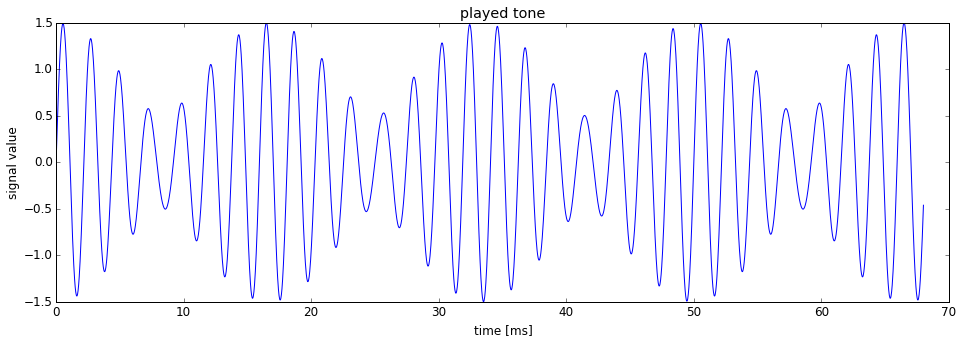

In [7]:
figure(figsize=(16,5))
xlabel('time [ms]')
ylabel('signal value')
title('played tone')
# plot the first 3000 entries of data
plt.plot(np.arange(0,3000)*1000/rate,data[0:3000]);

This is the *time domain* plot; we can see the value of the signal at each moment in time. We can see that the behavior is oscillatory, and you can intuitively see that there are two frequencies of sine waves involved. But what are they?

In order to see the frequencies, we are going to use a tool called **Discrete Fourier Tranform** that has been introduced in lecture. The mathematical machinery to find the representation of a signal with respect to sinusoids with different frequencies is very similar in principle to the tools you have used for change of basis in this course. However, for now, consider this tool as a "black box" that takes you to and from the frequency domain. This is because there is a fast algorithm for changing bases to the frequency domain known as the "Fast Fourier Transform" that is built on a clever divide-and-conquer recursion, but you will have to wait till **170** to learn how exactly it works.  

Run the following two blocks of code to see the frequency plot.

In [8]:
#Takes a time domain signal and represents it in the frequency domain
def time_to_freq(signal):
    return np.fft.rfft(signal)

#Takes a frequency domain representation of a signal and return the equivalent time domain signal
def freq_to_time(freqs):
    return np.fft.irfft(freqs)

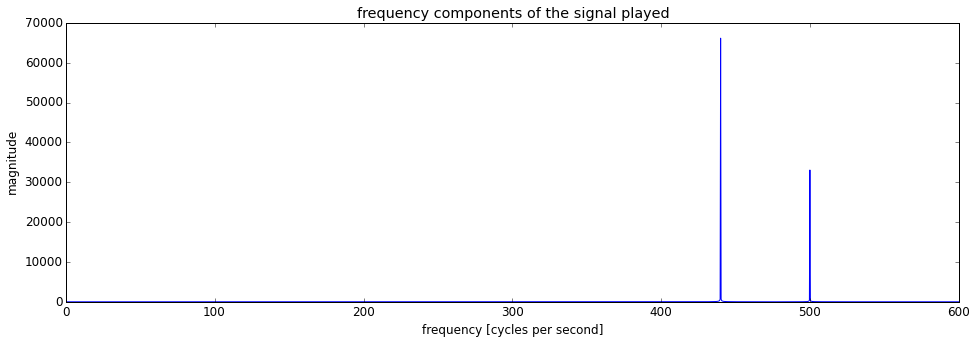

In [9]:
frequencies = time_to_freq(data)
figure(figsize(16,5))
xlabel('frequency [cycles per second]')
ylabel('magnitude')
title('frequency components of the signal played')
frequency_axis = np.fft.rfftfreq(len(data),d=1./rate);
plt.xlim([0,600]);
plt.plot(frequency_axis,np.abs(frequencies));

We can clearly see 2 peaks and even their relative weights! Do not worry about the exact frequency or coefficient values. 

**<span style="color:red">OPTIONAL -- FOR-FUN-EXERCISE: Can you identify the played [notes](http://www.phy.mtu.edu/~suits/notefreqs.html)?</span>**

**<span style="color:red">Play the audio `mystery.wav` file, and try to hear the distinct frequencies.</span>**

In [16]:
(rate2, data2) = wf.read("mystery.wav")
Audio(data2, rate=rate2)

**<span style="color:red"> Complete the following code, and get both time and frequency domain plots for `mystery.wav`. </span>**

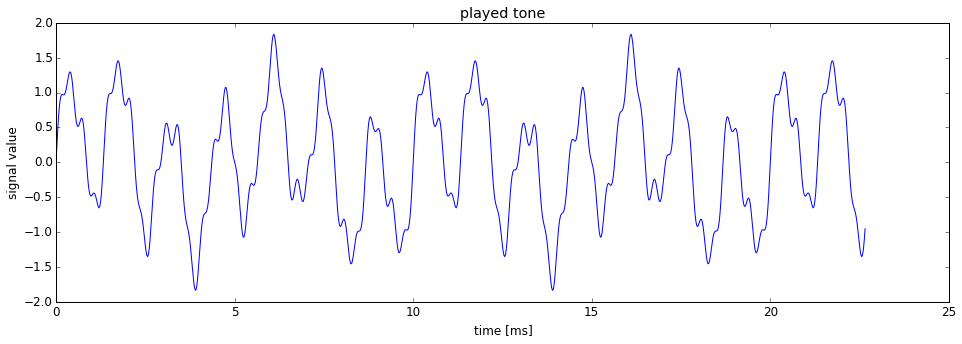

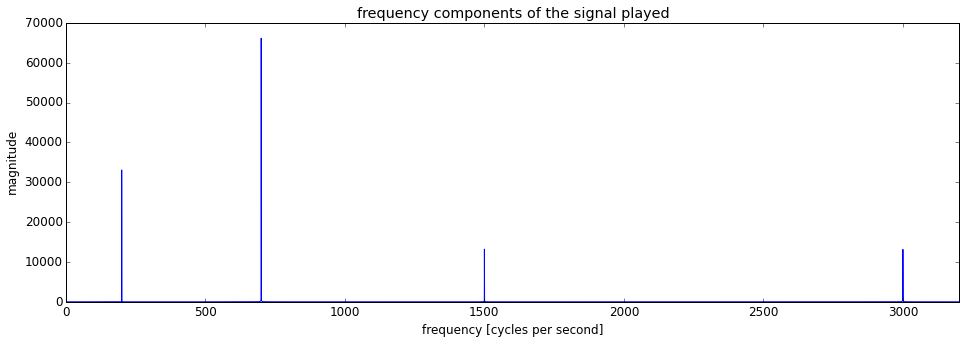

In [19]:
figure(figsize=(16,5))
xlabel('time [ms]')
ylabel('signal value')
title('played tone')
# plot the first 1000 entries of data2
plt.plot(np.arange(0,1000)*1000/rate2,data2[0:1000]);

figure(figsize(16,5))
title('frequency components of the signal played')
xlabel('frequency [cycles per second]')
ylabel('magnitude')
frequency_axis = np.fft.rfftfreq(len(data2),d=1./rate2);

frequencies2 = time_to_freq(data2)

plt.plot(frequency_axis,np.abs(frequencies2));
plt.xlim([0,3200]);

**<span style="color:red">How many frequencies were there in the original signal?</span>**

> Write your answer here:

4

<a id='task2'></a>
## Task 2: Listening to Radio 

**Amplitude modulation (AM)** is one of the simplest methods of wireless transmition of information. Although this method was first developed in the early 20th century, [AM radio stations](http://radio-locator.com/cgi-bin/locate?select=city&city=Berkeley&state=CA&band=Both&dx=0&sort=freq) that exist today use the same technique to transmit audio. Although we can't receive signals from these radio stations deep within the first floor of Cory Hall, we have our own AM transmitter set up in the lab! Before we get into AM radio, let's talk about the tool we will use to receive it.

<a id='intro'></a>
## Software Defined Radio

For most of radio’s history, things like tuning to a particular frequency, demodulation, etc. were handled by physical hardware (often with dials to adjust volume, frequency, etc. by physically changing certain resistances or capacitances in the circuit). This meant that a radio’s capabilities were either limited and pre-determined at construction, or buried beneath enough complexity to require licensed operators.

**Software Defined Radio (SDR)** shifts most of this complexity to software instead. An SDR still requires some kind of antenna and amplifier. However, it then digitizes the raw data and allows the user to do any further processing on a computer. 

### How Does it Work?

Just like a regular radio, the antenna plugged into your computers captures the radio signals being broadcast. After that, a regular consumer radio would then use complex circuits to convert the data transmitted on that signal into audio that you hear. On the other hand, an SDR simply takes the raw signal and lets your computer handle the rest. The block diagram below shows the components found in a typical SDR.

</br>
<center>
<img src="sdrFigure.png" align="center" style="height:100px" />
</center>

### Looking For Tones

The world is full of radio signals that we can measure, but we have a transmitter in the lab broadcasting the following signal:
$$x(t) = \cos(2 \pi f_c t) \left(1 + \cos(2 \pi f_1 t)\right)$$

In our setup $f_c = 446 \;\text{MHz}$ and $0 \;\text{Hz} \le f_1 \le 3500 \;\text{Hz}$. 

**<span style="color:red">Simplify the signal $x(t)$ into a sum of cosines or sines (hint: there will be three terms), what are their frequencies? This [wikipedia article](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Product-to-sum_and_sum-to-product_identities) would be helpful in remembering trig identities.</span>**
> Write your answer here: 

$$x(t) = \cos(2 \pi f_c t) + \frac{1}{2} * \cos(2 \pi t * (f_1 - f_c)) + \frac{1}{2} * \cos(2 \pi t * (f_1 + f_c))$$

For receiving and decoding radio signals we are going to use the software **SDRSharp** (there is a shortcut to the software on your desktop). SDRSharp is capable of decoding the **raw radio signal** received by the SDR and **converting it into the meaningful audio signal** you hear from the speakers.

**<span style="color:red">Open SDRSharp and set the center frequency to the peak near $446 \;\text{MHz}$.
Select the `AM` option on the left panel and make sure you can hear the audio being transmitted.</span>**

**<span style="color:red">Use SDRSharp to determine the frequency $f_1$. To have finer display of frequency information, click `FFT Display` on the left menu and change `resolution` to $65536$. You can zoom in using the slider to the right hand side of the plot.</span>**
> Write your answer here: $f_1 = .002 MHz$

**<span style="color:red">SDRSharp shows two plots in the main interface. What are the axes of the top plot?</span>**
> Write your answer here: Frequency, amplitude

**<span style="color:red">What does the moving axis of the bottom plot represent?</span>**
> Write your answer here: representation of the signal in the frequency domain

In the rest of this lab, you will implement the steps SDRSharp takes to decode AM signals in Python!

### **<span style="color:red">Attention:</span> <span style="color:blue">Before you continue below please close SDRSharp. Otherwise IPython will not be able to connect to the device and throw an error when you try to get readings from the SDR dongle.</span>**


<a id='task3'></a>
## Task 3: Demodulating AM

As the name suggests, amplitude modulation encodes information such as audio in the amplitude of another signal. In this section, we are modulating (changing) the amplitude of our $446 \;\text{MHz}$ carrier signal based on the audio signal we are transmitting. Assuming that for the signal we wish to transmit $A(t)$, $A(t)+1$ is always positive, we simply multiply this by our carrier frequency to get the equation representing the output of the transmitter:
$$y(t) = \cos(2\pi f_c t)(A(t)+1).$$ The output results in something like this:

<center>
<img src="http://www-inst.eecs.berkeley.edu/~ee16a/sp15/Labs/wireless/nb_img/wk2_am_example.png" align="center" style="height:200px" />
</center>

Intuitively, you should be able to see that all the information in $A(t)$ is still available. The question is how to get it out. 

After amplifying the signal received by the antenna, the SDR applies the series of operations: 
* First, it multiplies the received signal separately by a sine and a cosine. (This corresponds to multiplication by a complex exponential.)
* Next, the SDR applies a low pass filter and finally converts the continuous time waveform into digital values that can be read by the computer. 

The output of the **`get_samples`** function returns complex numbers (where the sine channel corresponds to the imaginary part) resulting from the operations shown above.

**<span style="color:red">Run the following 4 blocks of code below to gather samples from the SDR and plot them.</span>**

In [20]:
from rtlsdr import RtlSdr

# This line of code is to fix if the SDR was not closed properly
try:
    sdr.close()
except:
    pass

SAMPLE_RATE = 2.4e6
SAMPLE_TIME = 3
CENTER_FREQ = 446e6
AUDIO_RATE = 44100
SDR_GAIN = 40

CHUNK = 1024

In [21]:
"""
This connects to your sdr and returns the samples it receives.
"""
def get_samples(sampling_time):
    # SDR object
    sdr = RtlSdr()
    
    # setup the SDR options
    sdr.sample_rate = SAMPLE_RATE
    sdr.gain = SDR_GAIN
    sdr.center_freq = CENTER_FREQ
    
    # capture the signal
    print('Reading samples...')
    # execute the print statement immediately
    # if this function is not called, python will print 
    # after function completes
    sys.stdout.flush() 
    start = time()
    samples = sdr.read_samples(SAMPLE_RATE*sampling_time)
    dt = time() - start
    print('Done reading. Time taken: ' + str(dt))
    
    sdr.close()
    return samples

"""
This function takes in samples, downsamples them to audio rate, 
and then returns the audio player.
"""
def play(samples):
    # the samples are at rate SAMPLE_RATE which is much larger than what we need
    # we decrease the rate to AUDIO_RATE
    x = np.round(np.arange(0,len(audio),SAMPLE_RATE/AUDIO_RATE))
    x = x.astype(int)
    decaudio = audio[x]
    # return the audio player
    return Audio(decaudio, rate=AUDIO_RATE)

In [22]:
# Record SAMPLE_TIME seconds of samples from the radio
samples = get_samples(SAMPLE_TIME)

Reading samples...
Done reading. Time taken: 4.330432891845703


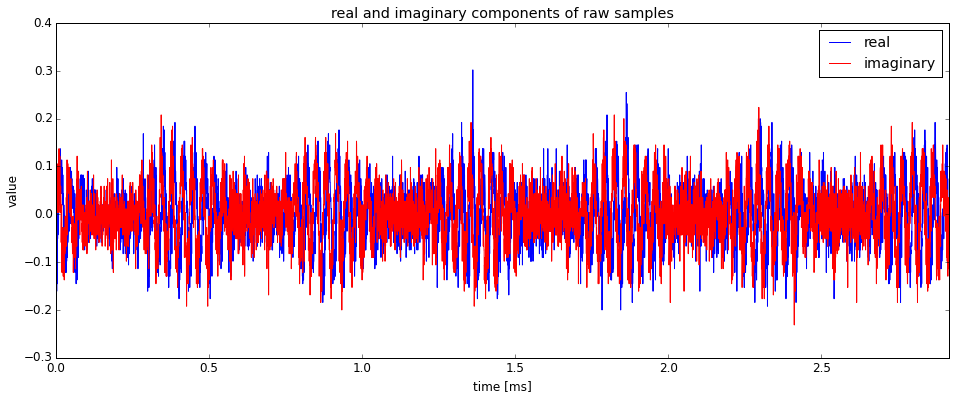

In [23]:
PLOT_START_INDEX = 100000
NUMBER_OF_SAMPLES = 7000
PLOT_END_INDEX = PLOT_START_INDEX + NUMBER_OF_SAMPLES

plt.figure(figsize=(16,6));
time_axis = np.arange(0,NUMBER_OF_SAMPLES)/SAMPLE_RATE;
plt.plot(time_axis*1000,np.real(samples[PLOT_START_INDEX:PLOT_END_INDEX]), label='real');
plt.plot(time_axis*1000,np.imag(samples[PLOT_START_INDEX:PLOT_END_INDEX]),'r', label='imaginary');
# limit the plot window to see the signal clearly
plt.xlim([0,time_axis[-1]*1000])
plt.legend();
plt.ylabel('value')
plt.xlabel('time [ms]')
plt.title("real and imaginary components of raw samples");

**<span style="color:red">Does the amplitude seem to vary as we expect?</span>**
> Write your answer here:

Wireless transmissions are almost always corrupted by noise. In this application, we can literally hear in SDRSharp the undesired sounds such as static or high pitched tones in addition to the music we expect to hear.

In order to address this, we will utilize the moving average **low pass filter**
$$y[n] = \frac{x[n-L] + \cdots + x[n] + \cdots + x[n+L]}{2L+1}.$$
Adding a filter that eliminates tones (frequencies) outside the range of human hearing will make the final output sound much more like the music we expect to hear:

Intuitively, a moving average replaces each value with its average with the points around it. Hence, it "smooths" the signal in the sense that it eliminates rapid transitions; in the case of a high frequency sine or cosine which changes its value very rapidly over time, our moving average could largely eliminate it. (In particular, if the moving average is the same length as an integer multiple of periods of the cosine, it would entirely eliminate it.)

The following code will help understand how moving average eliminate high frequencies. Remember in lecture where we studied the **eigenvectors of circulant matrices and found out that they were tones**. 

Let us look at the **circulant matrix $H$ that represents a moving average**. Since it is a circulant matrix, tones are its eigenvectors. In the following, we have a moving average filter that takes the average of `LENFILT` consecutive entries of the signal. We multiply the circulant matrix by a sinusoidal `v` with **frequency $K$ times a chosen fundamental frequency (frequency increases with $K$)**. Look at the output $y = Hv$ in the following plot. Do you see that sinusoidals are eigenvectors of $H$?

The second plot below shows the frequency components of the moving average filter (calculated by the same way as we have done for frequencies of audio above).

**<span style="color:red">Change the value of $K$ between $\{0,1,2,\cdots,31\}$. Can you observe a relationship between its values and the eigenvalues of $H$? (Hint: What do red lines correspond to?)</span>**
> Write your answer here: 

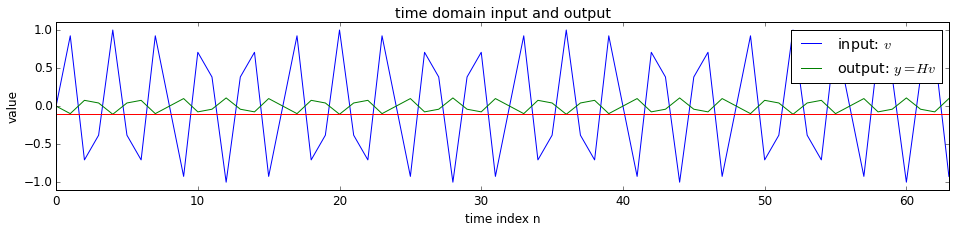

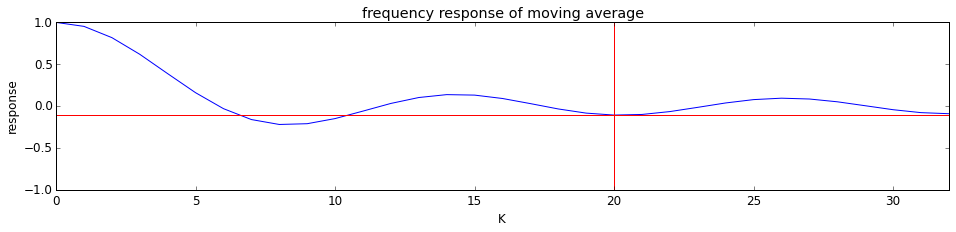

In [47]:
##############################

# choose an odd number for the filter length
LENFILT = 11;
# choose input sinusoidal frequency from {0,1,2,...,31}
K = 20;

##############################

TOTALLENGTH = 64;

# time domain: moving average filter
ma_time = np.pad(np.ones(LENFILT)/LENFILT,(0,TOTALLENGTH-LENFILT),'constant')
ma_time = np.roll(ma_time,-LENFILT//2+1)

# frequency domain: moving average filter
ma_freq = time_to_freq(ma_time)

# the circulant matrix corresponding to moving average filter
H = circulant(ma_time)

# fundamental frequency
F0 = 1/TOTALLENGTH;

# time indices
time_n = np.arange(0,TOTALLENGTH)
# input: a sinusoid that has frequency K times the fundamental frequency
v = np.sin(2*np.pi*F0*K*time_n)

# output: sinusoid multiplied by the matrix H
y = np.dot(H,v)

figure(figsize=(16,3))
plt.ylim([-1.1,1.1]);
plt.xlim([0,TOTALLENGTH-1])
plt.plot(v,label='input: $v$')
plt.plot(y,label='output: $y = Hv$');
plt.plot((0, TOTALLENGTH), (np.real(ma_freq[K]), np.real(ma_freq[K])), 'r-')
plt.xlabel('time index n');
plt.ylabel('value');
plt.title('time domain input and output');
plt.legend();


plt.figure(figsize=(16,3));

plt.xlabel('K');
plt.ylabel('response');
plt.title('frequency response of moving average')
plt.xlim([0,TOTALLENGTH/2]);
plt.plot(np.real(ma_freq));
plt.plot((K, K), (-1, 1), 'r-');
plt.plot((0, TOTALLENGTH/2), (np.real(ma_freq[K]), np.real(ma_freq[K])), 'r-');

**<span style="color:red">See that the `low_pass` function does the averaging operation described above.</span>**

In [30]:
def low_pass(sig, num_samples):
    """ Apply a moving average low pass filter to the input.
    Args:
    sig (np.ndarray): input signal to be filtered
    num_samples (int): number of values to average
    
    Returns:
    (np.ndarray): filtered values
    """
    ret = np.cumsum(sig)
    ret[num_samples:] = ret[num_samples:] - ret[:-num_samples]
    return ret[num_samples - 1:] / num_samples

**<span style="color:red">Run the code below to apply your low pass filter to the signal and plot the output.</span>**

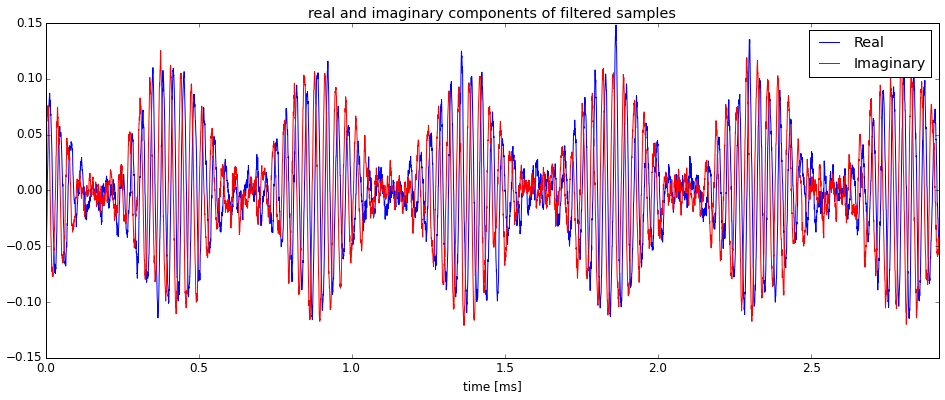

In [31]:
low_passed = low_pass(samples, 15)

plt.figure(figsize=(16,6))
plt.plot(time_axis*1000,np.real(low_passed[PLOT_START_INDEX:PLOT_END_INDEX]), label="Real");
plt.plot(time_axis*1000,np.imag(low_passed[PLOT_START_INDEX:PLOT_END_INDEX]),'r', label="Imaginary");
# limit the plot window to see the signal clearly
plt.xlim([0,time_axis[-1]*1000])
plt.legend();
plt.title("real and imaginary components of filtered samples");
plt.xlabel('time [ms]')

As explained above, the slow variation in the envelope of the high frequency signal corresponds to the audio that we're actually interested in.

**<span style="color:red">Based on your observations above and the discussion of AM, the function `demodulate_am` below to extract the audio signal from the output of the low pass filter.</span>**

In [36]:
def demodulate_am(samp):
    """ Demodulate AM.
    
    Args:
    samp (np.ndarray): samples from the SDR
    
    Returns:
    (np.ndarray): 
    """
    # we detect the envelope
    demod = np.abs(samp)
    
    # We don't know that the input signal (and therefore your demodulated signal)
    # are centered about zero.
    # In order to make sure the speakers can play the audio, 
    # we make sure that your output is centered around zero.
    return demod - np.average(demod)

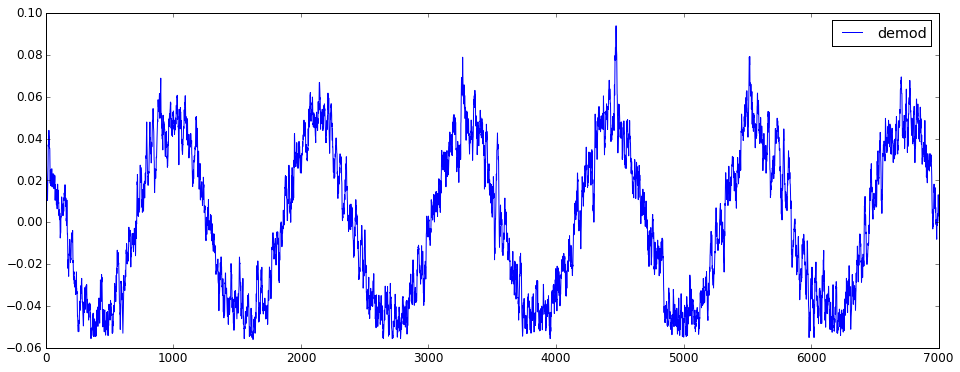

In [37]:
plt.figure(figsize=(16,6))
plt.plot(demodulate_am(low_passed[PLOT_START_INDEX:PLOT_END_INDEX]), label="demod")
plt.legend()

In [38]:
audio = demodulate_am(low_passed)
audio = audio/(2*max(audio))

play(audio)

**<span style="color:red">OPTIONAL -- FOR FUN: Ask your lab TA to play a song on the radio for you. What is the song that is playing? Accompany the recovered sound with the appropriate video played in silent mode.</span>**